<a href="https://colab.research.google.com/github.com/KGzB/CAS-Applied-Data-Science/blob/master/Module-2/CAS-D1-DescriptiveStatistics-Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook 1, Module 2, Statistical Inference for Data Science, CAS Applied Data Science, 2024-08-27, A. Mühlemann, University of Bern.

*This notebook is based on the notebook by S. Haug and G. Conti from 2020*


# 1. Descriptive Statistics on Single Features



**Goals**
- Graphical preparation of the data
- Calculate summary statistics


First load the necessary libraries / modules.

In [70]:
# Load the needed python libraries by executing this python code (press ctrl enter)
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd
import io

In this Notebook we will look at a dataset about air quality, which is provided under https://zenodo.org/records/3742173.

The dataset contains data on air quality monitoring and people counter of an office room at the University of Messina. And contains the rows

- *Date* timestamp
- *Pm1* is the amount of dust particles of size $< 1 \mu m$ in micrograms per $1m^3$ of air.
- *Pm 2.5* is the amount of dust particles of size $< 2.5 \mu m$ in micrograms per $1m^3$ of air
- *Pm10* ais the amount of dust particles of size $< 2.5 \mu m$ in micrograms per $1m^3$ of air
- *Temp* is the temperature in °C
- *Hum* is humidity in %
- Press is the atmospheric pressure
- *CO* is the CO consentration
- *CO2* is the CO$_2$ the concentrations
- *Label* is the number of people in the room

I uploaded the dataset to Github so that we can read it directly from there.

In [71]:
url = "https://github.com/KGzB/CAS-Applied-Data-Science/blob/master/Module-2/air_quality.csv?raw=true"
df = pd.read_csv(url, sep=";")
df.head() # Print the first five rows

,date,id,pm1,temp,hum,press,co,co2,pm2.5,pm10,label
0,2019-11-29 20:50:07 UTC,31476,7.0,20.2,51.1,1019.7942,4.45943,420.83377,8.0,10.4,0
1,2019-11-29 20:50:23 UTC,31477,7.0,20.2,51.1,1019.7473,4.75772,396.31818,9.0,11.5,0
2,2019-11-29 20:50:39 UTC,31478,7.0,20.2,51.1,1019.7868,4.72482,420.83377,12.0,13.6,0
3,2019-11-29 20:50:55 UTC,31479,5.0,20.1,51.1,1019.7796,4.75772,339.14816,7.0,12.4,0
4,2019-11-29 20:51:10 UTC,31480,6.0,20.1,51.0,1019.7796,4.72482,384.41788,8.0,9.5,0


## 1.1 Graphical Analyis
### 1.1.1 Pie chart and bar plot (categorical variables)
Pie charts are used to show proportions of a whole.

We could, for example, ask ourselves how the amount of people in the room are represented percentage-wise.

<Axes: >

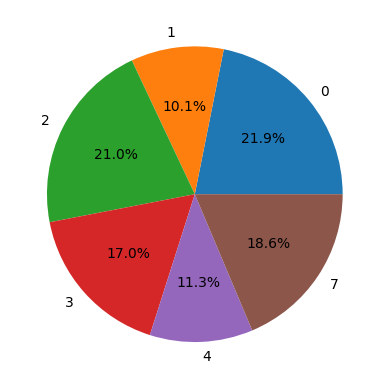

In [72]:
# Pie chart of the amount of measurements by number of people in the room.
df.groupby('label').size().plot(kind='pie', autopct='%1.1f%%' ,ylabel="")

The problem with pie charts is that if there are many groups we tend missinterpret the pie slices (https://www.data-to-viz.com/caveat/pie.html). Thus, it often is reasonable sense to use a barplot instead.

<Axes: ylabel='amount of measurements'>

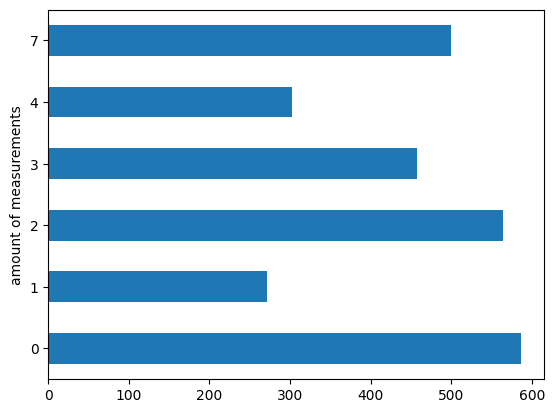

In [73]:
# Barplot of the amount of measurements by number of people in the room.
df.groupby('label').size().plot(kind='barh' ,ylabel="amount of measurements")

## 1.1.2 Histogram (numerical variables)
Histograms are used to display frequencies or proportions.

For example, we could use an histogram to analyze the humidity in the room.

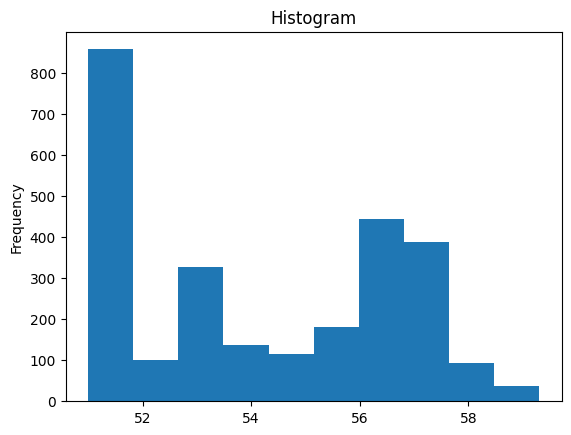

In [74]:
# histogramm of the humidity
df['hum'].plot(kind="hist",fill=True,histtype='barstacked',title='Histogram', label="Humidity in %", color= 'tab:blue')
plt.show()

We could also check whether the is a difference in humidity depending on the number of people in the room.

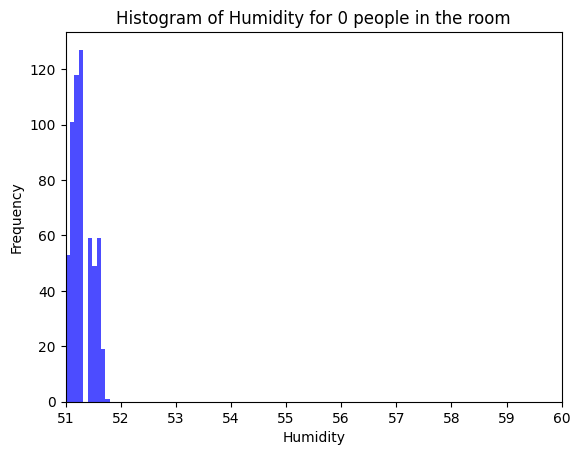

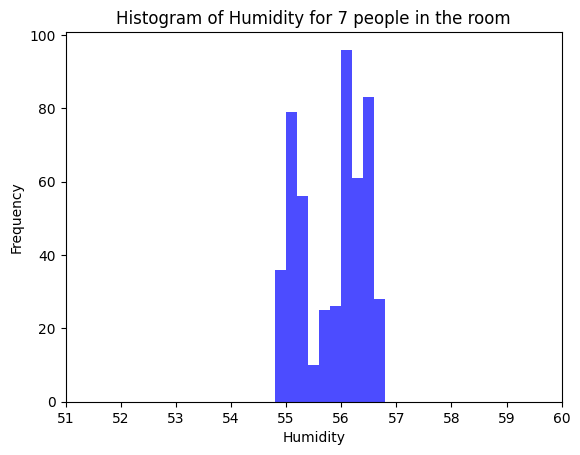

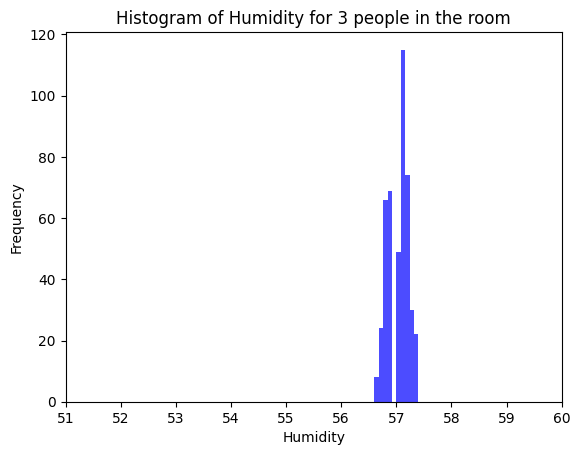

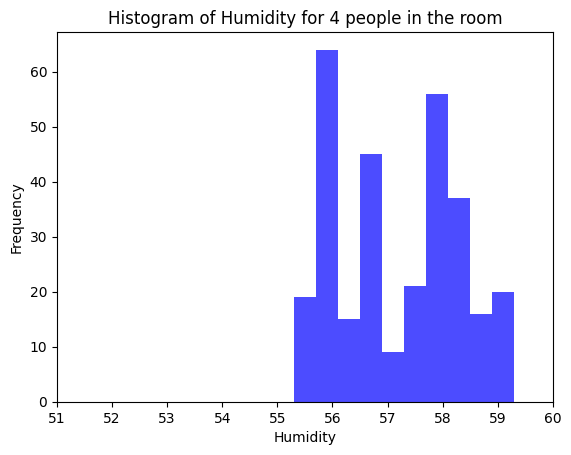

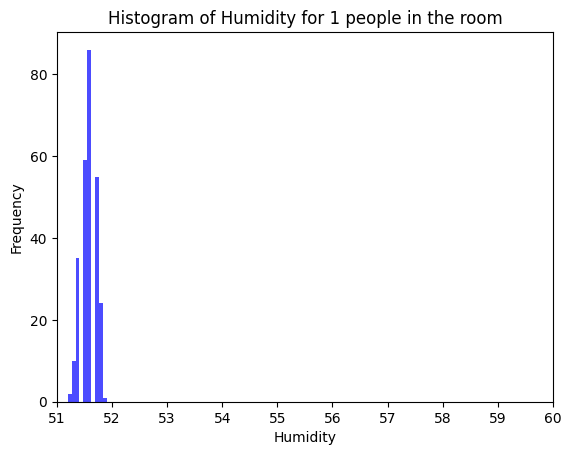

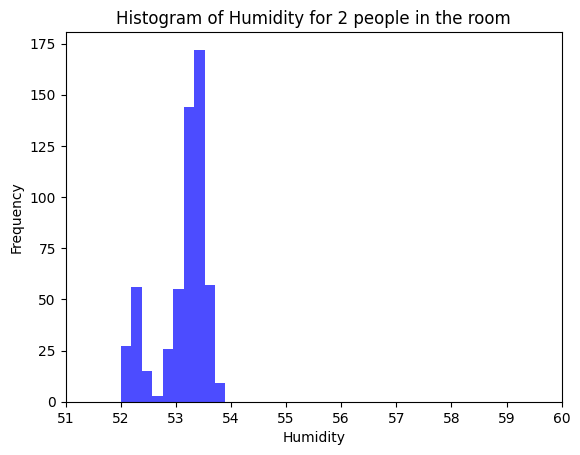

In [75]:
# get nr. of people
labels = df['label'].unique()

# Create a histogram for each number of people
for label in labels:
    subset = df[df['label'] == label]
    plt.hist(subset['hum'], alpha=0.7, color='blue')
    plt.title(f"Histogram of Humidity for {label} people in the room")
    plt.xlim(51, 60) # make sure the all have the same x-axis
    plt.xlabel('Humidity')
    plt.ylabel('Frequency')
    plt.show()

### 1.1.3 Scatter plot colored by species (simulatneous description)

Scatter plots use dots to represent values for two different numeric variables.

For example, we could look at the species and one of the numerical characteristics simulatneously.

I would assume the amount $CO_2$ concentration depends on the people in the room. Let us look at this using a scatter plot. Because we have a time series of measurements, it does not make sense to plot the data directy. The easiest option is to just calculate the mean $CO_2$ concentration per amout of people in the room. We do that here but of course many other options could be reasonable.

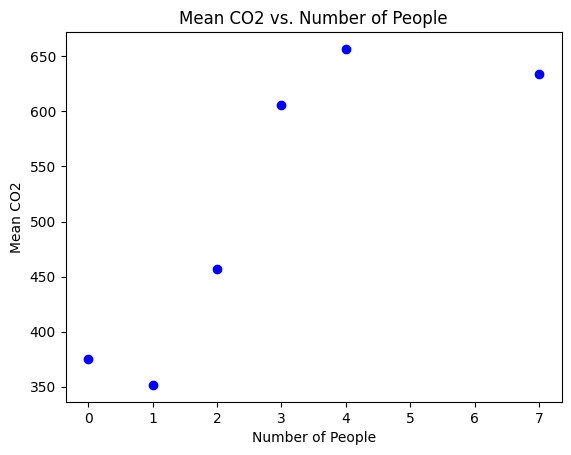

In [76]:
mean_co2 = df.groupby('label')['co2'].mean().reset_index()
#mean_co2

plt.scatter(mean_co2.label, mean_co2.co2, color='blue')
plt.title('Mean CO2 vs. Number of People')
plt.xlabel('Number of People')
plt.ylabel('Mean CO2')
plt.show()

What can you see in this picture?

# 1.2 Numerical analysis

# 1.2.1 Location

Location measures are used to describe typical values of a variable. Best known are the mean and the median.


In [77]:
# Mean of all reasonable variables by label
grouped_df = df[['pm1','temp','hum','press','co','co2','pm2.5','pm10','label']].groupby("label")
grouped_df.mean()

,pm1,temp,hum,press,co,co2,pm2.5,pm10
label,,,,,,,,
0,7.367235,20.291297,51.289078,1020.155064,4.674944,375.470210,9.667918,12.311433
1,6.710294,21.721324,51.577574,1022.630356,5.443587,351.660070,8.969485,10.024265
2,7.332979,22.413475,53.138652,1023.032831,5.892983,457.311494,9.976596,11.733511
3,5.748797,21.536543,57.029759,1019.239444,5.225377,605.565968,6.475711,6.885339
4,10.370199,22.439073,57.154636,1024.398670,5.808343,656.708818,13.229139,15.913576
7,5.936400,21.561400,55.802000,1020.227958,5.319552,633.601407,7.402200,8.872600


In [78]:
# Median of all reasonable variables by label
grouped_df.median()

,pm1,temp,hum,press,co,co2,pm2.5,pm10
label,,,,,,,,
0,7.0,20.2,51.3,1019.75100,4.69186,384.41788,9.0,10.5
1,6.0,21.7,51.6,1022.61085,5.43739,350.12042,8.0,9.4
2,6.0,22.4,53.3,1022.97015,5.91299,459.42917,9.0,10.5
3,4.0,21.6,57.1,1019.18530,5.24513,604.59503,6.0,6.3
4,10.0,22.4,57.2,1024.38125,5.81836,653.33313,13.0,15.6
7,5.0,21.6,56.0,1020.31595,5.34143,636.81207,7.0,8.4


What do you notice when you compare the mean with the median?

## 1.2.2 Spread

Typical values are interesting but sometimes more information is needed. It is for example also of interest to see how spead the values are. Typical measures for the spread are the variance, standard deviation, inter quartile range, etc.


In [79]:
# standard deviation of all reasonable variables by label
grouped_df.std()

,pm1,temp,hum,press,co,co2,pm2.5,pm10
label,,,,,,,,
0,7.395648,0.221053,0.189782,0.675923,0.114448,39.901623,4.571045,13.506140
1,12.314833,0.204347,0.131317,0.107623,0.125067,42.917856,10.475859,5.655954
2,9.434632,0.129609,0.467861,0.400874,0.153529,59.161239,10.700560,10.137162
3,17.632137,0.199119,0.191344,0.181146,0.114250,66.943241,13.898907,7.094220
4,7.261035,0.175197,1.107343,0.091498,0.215622,96.942039,4.456972,12.832625
7,7.373638,0.190269,0.590469,0.291281,0.169468,84.745595,1.907094,3.618848


Which variable has the most standard deviation? would you have expected that?

We can also look at the IQR.

In [80]:
# IQR of CO2
grouped_df['co2'].quantile(0.75)-grouped_df['co2'].quantile(0.25)


,co2
label,
0,69.30793
1,66.53681
2,82.52444
3,109.93445
4,151.25983
7,113.74847


Compare the standard deviation of CO2 with its IQR.
(Information on the *-operator: https://treyhunner.com/2018/10/asterisks-in-python-what-they-are-and-how-to-use-them/)



Alternatively, one can also get most of those measures with a single command:

In [81]:
grouped_df.describe()

pm1                                                          temp  \
       count       mean        std  min  25%   50%   75%        max  count   
label                                                                        
0      586.0   7.367235   7.395648  0.0  6.0   7.0   8.0  151.00000  586.0   
1      272.0   6.710294  12.314833  0.2  5.0   6.0   6.0  177.60001  272.0   
2      564.0   7.332979   9.434632  0.0  6.0   6.0   7.0  167.60001  564.0   
3      457.0   5.748797  17.632137  0.0  4.0   4.0   5.0  249.00000  457.0   
4      302.0  10.370199   7.261035  0.9  9.0  10.0  11.0   78.00000  302.0   
7      500.0   5.936400   7.373638  0.6  5.0   5.0   6.0  151.00000  500.0   

                  ... pm2.5              pm10                             \
            mean  ...   75%        max  count       mean        std  min   
label             ...                                                      
0      20.291297  ...  11.0   73.70000  586.0  12.311433  13.506140  0.2   
1      21.721324  ...   9.0  147.60001  272.0  10.024265   5.655954  4.0   
2      22.413475  ...  10.0  191.10001  564.0  11.733511  10.137162  0.0   
3      21.536543  ...   6.0  231.10001  457.0   6.885339   7.094220  0.0   
4      22.439073  ...  14.0   73.70000  302.0  15.913576  12.832625  1.7   
7      21.561400  ...   8.0   28.00000  500.0   8.872600   3.618848  0.0   

                                    
        25%   50%   75%        max  
label                               
0       9.4  10.5  13.5  210.10001  
1       8.4   9.4  10.4   77.00000  
2       9.4  10.5  12.5  188.10001  
3       5.3   6.3   7.3  151.00000  
4      13.6  15.6  17.6  231.60001  
7       7.4   8.4   9.5   73.70000  

[6 rows x 64 columns]

However, this output is not very comprehensible. Here it makes more sense to consider only one species for the summary:

In [82]:
grouped_df['co2'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,586.0,375.470210,39.901623,297.50146,339.14816,384.41788,408.45609,446.31812
1,272.0,351.660070,42.917856,268.55759,317.88107,350.12042,384.41788,446.31812
2,564.0,457.311494,59.161239,307.58145,417.73935,459.42917,500.26379,573.46326
3,457.0,605.565968,66.943241,446.31812,543.39868,604.59503,653.33313,740.15442
4,302.0,656.708818,96.942039,408.45609,588.89459,653.33313,740.15442,853.91278
7,500.0,633.601407,84.745595,433.45386,573.46326,636.81207,687.21173,834.20953


Do all these digits after the comma make sense?

## 1.2.3 Shape

Another measure that is often looked at is the shape of the distribution. The mostly used measures are the skewness and the kurtosis.

In [83]:
# skew of all reasonable variables by label
grouped_df.skew()

,pm1,temp,hum,press,co,co2,pm2.5,pm10
label,,,,,,,,
0,15.233355,0.737410,0.431388,0.736823,-0.338809,-0.319897,9.549340,11.103684
1,12.261178,0.064236,-0.238889,0.545208,-0.067316,0.131163,10.451599,9.335121
2,11.912126,-0.256834,-1.115943,0.178256,-0.269798,-0.067470,13.610901,14.309416
3,12.409139,-0.502570,-0.105190,0.599238,-0.495306,-0.168157,14.811345,18.515137
4,7.869603,-0.413572,0.084466,2.200278,-0.492329,-0.169431,8.074253,15.853521
7,17.137870,-0.474464,-0.245782,-0.568782,-0.198077,-0.068627,2.574650,11.545707


The skewness of *pm1* is $>0$ for all characteristics. What does that mean?

Now let us look at the kurtosis.

In [84]:
# kurtosis of all reasonable variables by label
grouped_df.apply(pd.DataFrame.kurt, numeric_only=True)

,pm1,temp,hum,press,co,co2,pm2.5,pm10,label
label,,,,,,,,,
0,267.478623,-1.204487,-0.653963,-1.400790,-1.033903,-1.048778,131.025296,134.769027,0.0
1,157.028460,-1.109434,-0.256651,-0.416858,-0.586950,-0.748178,123.665561,100.617964,0.0
2,169.236853,-0.251325,0.058721,-1.365221,-0.523107,-0.712823,204.070559,227.168051,0.0
3,160.462530,-0.947466,-0.701530,-0.769423,-0.409908,-0.927387,223.952141,375.553733,0.0
4,66.302654,-0.244373,-1.232672,12.074332,-0.391559,-0.793742,113.636988,267.469748,0.0
7,318.356481,-0.755754,-1.377109,-1.059751,-0.391573,-0.484254,27.560089,206.447236,0.0


The idea behind the kurtosis is the following:
Some numerical characteristics, when the sample size is large and the intervals are small, result in a histogram that resembles a Gaussian bell curve. In this case, the value of the kurtosis is close to zero. If the tails are heavier than you would expect for a Gaussian distribution the kurtosis will be substantially positive. If the tails are less heavy than you would expect for a Gaussian distribution the kurtosis will be negative.


## 1.7 Outlook
The *co*-concentration when 7 people are in the room, the curtosis is close to zero. Moreover, its skewness is close to 0. Therefore, a Gaussian model could be suitable. To get an idea whether this is plausible let us compare the histogram to the Gaussian density function.

When looking at hypothesis testing, we will see how to test this mathematically.

Our model is a normal distribution with the mean and width taken from the dataset: **norm.pdf(x,mean,width)**.

5.31955212 0.16946808172559547


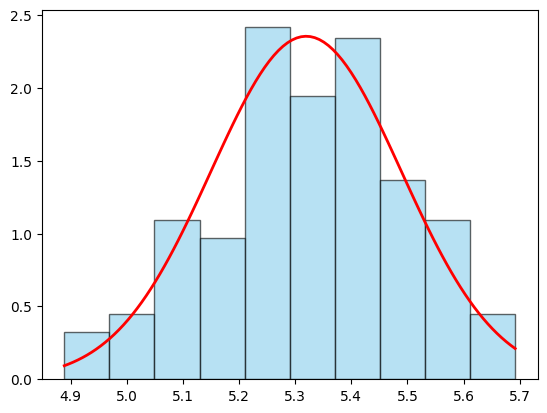

In [85]:
from scipy.stats import norm

# Get mean and std from co
df7=df[df['label']==7]
mean  = df7['co'].mean()
std = df7['co'].std()
print(mean,std)

# Create gaussian pdf
xmin = df7['co'].min()
xmax = df7['co'].max()
x = np.linspace(xmin, xmax, 100)
pdf = norm.pdf(x, mean, std)

# Plot histogram
plt.hist(df7['co'], density=True, alpha=0.6, color='skyblue', edgecolor='black', label=' Histogram')
plt.plot(x, pdf, 'r', linewidth=2, label='Normal Distribution')
plt.show()

# 2. Simultaneous Description of two Features

In the first part of this notebook, we only looked at individual characteristics. For example, we calculated the mean *slength* of *iris setosa*. Of course, we did this simultaneously for all characteristics and species, but we never compared two characteristics directly. That is what we would like to do now.

## 2.1 Graphical Analysis

### 2.1.1 Boxplots

A boxplot is a graphical display of the minimum, maximum, and the 3 quartiles.
For example, we could display the CO2-concentration for the different amount of people present.


<Axes: >

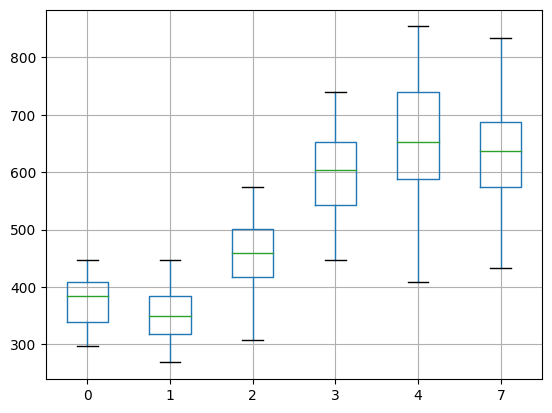

In [86]:
# CO2-concentration for the different amount of people present.
df_PM1=df[['co2', 'label']]
fig, ax = plt.subplots(1,1)
df_PM1.pivot(columns='label', values='co2').boxplot()

### 2.1.2 Scatter matrix

Now let us see whether some of the air quality measures correlate. To this end, we look at the scatter plots of the different measures when 7 people are present in the room. (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.plotting.scatter_matrix.html)

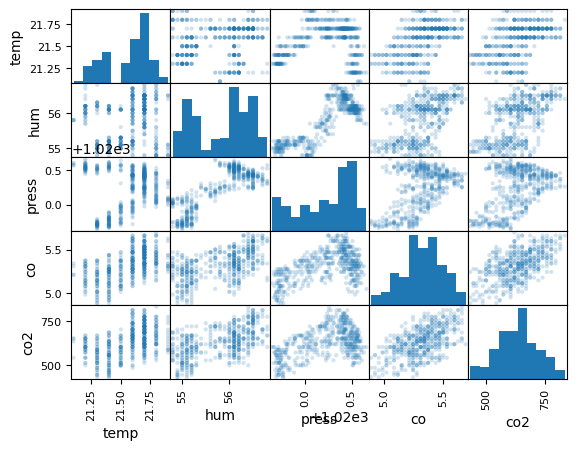

In [87]:
from pandas.plotting import scatter_matrix
scatter_matrix(df7[['temp','hum','press','co','co2']], alpha=0.2, diagonal='hist')
plt.show()

There seems to be some positive relationship between pressure and humidity (more pressure implies more humidity). Does that make sense?

## 2.2 Numerical Analyis

### 2.3 Correlation
To get more information on the correlation between two variables the correlation coefficient is calculated.

Let's see whether the correlation coefficient does support this observation.

**Caution**: correlation not equals causation!!


In [88]:
df7[['temp','hum','press','co','co2']].corr()

,temp,hum,press,co,co2
temp,1.000000,0.182096,0.126814,0.562026,0.488197
hum,0.182096,1.000000,0.832913,0.567877,0.575551
press,0.126814,0.832913,1.000000,0.488126,0.476940
co,0.562026,0.567877,0.488126,1.000000,0.574882
co2,0.488197,0.575551,0.476940,0.574882,1.000000


What is the definition of the correlation?


What kind of relationship between *temp* and *hum* does the correlation coefficient suggest?

How about the other numbers of people?

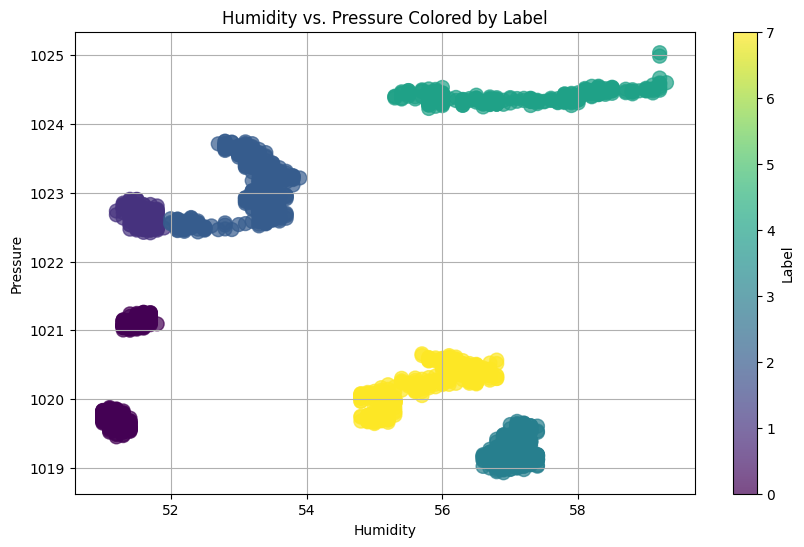

In [89]:
# Create a scatter plot of humidity and pressure with the points
# colored according to the nr of people in the room
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['hum'], df['press'], c=df['label'], s=100, alpha=0.7)

# Adding colorbar to indicate the label values
cbar = plt.colorbar(scatter)
cbar.set_label('Label')

# Adding titles and labels
plt.title('Humidity vs. Pressure Colored by Label')
plt.xlabel('Humidity')
plt.ylabel('Pressure')
plt.grid(True)

# Show the plot
plt.show()

## Remark

This was only a short overview on what can be done and on how these approaches can be implemented using python. Of course there are many more options that could be explored.



### Extra Exercise
Under the link https://zenodo.org/records/13373845 you can find some interesting questionaire data. Analyse this date descriptively.